## Teachable Machine - Classification of Rock, Paper, Scissors
In this project, we utilize a pre-trained machine learning model from Google's Teachable Machine to classify images of rock, paper, and scissors. The model is trained and exported as a .h5 Keras model, which we will load and use to make predictions on sample images.


### Import Required Packages

tensorflow.keras.models for loading the model,
PIL.Image and PIL.ImageOps from Pillow for image processing,
numpy for numerical operations

In [13]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np
import matplotlib.pyplot as plt



### Loading the Model and Labels

In [14]:

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("model/keras_model.h5", compile=False)

# Load the labels
class_names = open("model/labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)


## Image Preprocessing
Next, we process the input image to ensure it matches the model's expected input dimensions. This includes resizing the image to 224x224 pixels and normalizing its pixel values.

In [17]:
# Replace this with the path to your image

image = Image.open("C:/ece5831-2024assignments/05/Image.jpg").convert("RGB")
# Resizing the image to 224x224 and cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# Turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image array
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array


## Predicting the Class
With the preprocessed image ready, we can now use the model to predict the class (rock, paper, or scissors) and display the confidence score.

1/1 [==============================] - 0s 42ms/step
Class: paper
Confidence Score: 0.9999999


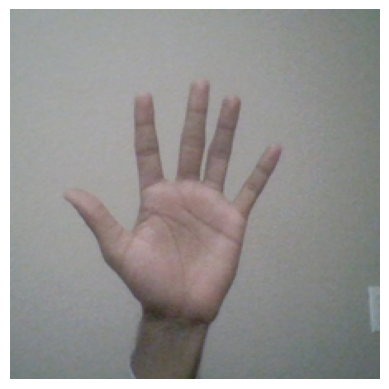

In [18]:
# Predict using the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print the predicted class and confidence score
print("Class:", class_name[2:], end="")  # Remove any numbering from label
print("Confidence Score:", confidence_score)

plt.imshow(image)  # Display the image
plt.axis('off')    # Hide the axis
plt.show()        # Show the plot


## Conclusion
In this project, we successfully used a model trained on Google's Teachable Machine to classify rock, paper, and scissors images. We set up the environment, loaded the model, preprocessed the images, and made predictions using the Keras library in Python.

